# BeautifulSoup 으로 네이버 실시간 검색어 크롤링하기
* 난이도 : ★★☆☆☆☆☆☆☆☆
* 필요라이브러리: requests, BeautifulSoup4, time



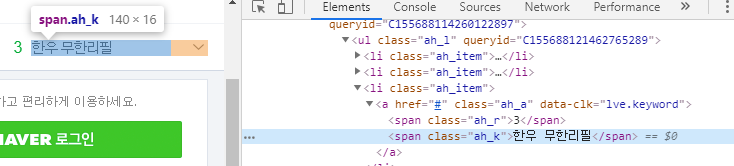

* 개발자도구로 대상 데이터의 DOM tree 형태를 확인하여 어떤 태그를 대상으로 할지 분석합니다.


In [ ]:
# 라이브러리 임포트
import requests
from bs4 import BeautifulSoup

# 네이버 메인 URL
url = "https://www.naver.com"

# url 접속 후 서버의 응답을 r 변수에 저장
r = requests.get(url)

# 뷰티풀숩 객체 생성 기본 html.parser 파서 사용
bs = BeautifulSoup(r.text, "html.parser")

# find_all 함수로 li 태그에 class 명이 ah_item 인 요소를 lists 변수에 저장
lists = bs.find_all("li", {"class": "ah_item"})

# lists 요소만큼 반복
for li in lists:
    # lists 의 요소인 li 요소 하위에 span 태그의 클래스명이 ah_k 인 요소의 text 값을 title 에 저장
    title = li.find("span", attrs={"class": "ah_k"}).text
    print(title)

In [ ]:
# 필요 라이브러리 임포트
import time
import requests
from bs4 import BeautifulSoup

def time_function(f):
    '''함수 사용 시간을 측정하기 위한 데코레이터
    Args
        f (function) : 함수
    Return
        function : 함수 포인터
    '''
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = f(*args, **kwargs)
        end_time = time.time() - start_time
        print("{} {} time: {}".format(f.__name__, args[1], end_time))
        return result
    return wrapper

# 접속 URL (네이버)
url = "https://www.naver.com"

@time_function
def r_find_all(url, parser):
    '''뷰티풀숩의 find_all 함수를 사용해서 파싱
    Args
        url (str): 접속 URL
        parser (string): 뷰티풀숩 내부에서 사용할 파서 이름 (html.parser, lxml)
    Returns
        list: 파싱 결과 리스트
    '''
    
    # requests 객체로 url 접속 후 서버의 응답을 r 에 저장
    r = requests.get(url)
    
    # 뷰티풀숩 객체 생성 여기서 인자로 넘어온 parser를 사용
    bs = BeautifulSoup(r.text, parser)
    
    # 뷰티풀숩의 find_all 함수를 사용해서
    # li 태그의 class 명이 ah_item 인 요소 모두 선택하여 lists 에 저장
    lists = bs.find_all("li", {"class": "ah_item"})

    # 최종 결과를 리턴할 리스트 변수 생성
    titles = []
    # find_all 한 결과의 요소만큼 반복
    for li in lists:
        # lists 의 요소에서 태그명이 span 이고 class 이름이 ah_k 인 요소의 태그안의 내용(text)을 title 에 저장
        title = li.find("span", attrs={"class": "ah_k"}).text
        # 최종 결고 목록 리스트에 추가
        titles.append(title)
    # 최종 결과 리턴
    return titles

@time_function
def r_selector(url, parser):
    '''뷰티풀숩의 select 함수를 사용해서 파싱
    Args
        url (str): 접속 URL
        parser (string): 뷰티풀숩 내부에서 사용할 파서 이름 (html.parser, lxml)
    Returns
        list: 파싱 결과 리스트
    '''
    r = requests.get(url)
    bs = BeautifulSoup(r.text, parser)
    # 뷰티풀숩의 select 함수 사용
    # li 태그의 클래스명이 ah_item 인 요소 하위의 span 태그이며 클래스명이 ah_k 인 요소 선택
    lists = bs.select("li.ah_item > span.ah_k")
    for li in lists:
        print(li.text)

# htm.parser 파서를 사용하고 find_all 함수 사용
r_find_all(url, "html.parser")
# htm.parser 파서를 사용하고 select 함수 사용
r_selector(url, "html.parser")
# lxml 파서를 사용하고 find_all 함수 사용
r_find_all(url, "lxml")
# lxml 파서를 사용하고 select 함수 사용
r_selector(url, "lxml")